In [6]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

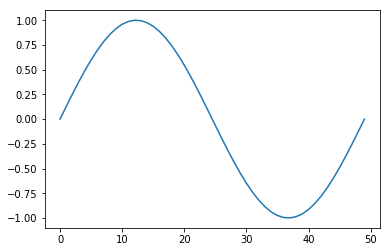

In [9]:
plt.plot(np.sin(np.linspace(0, np.pi*2)))

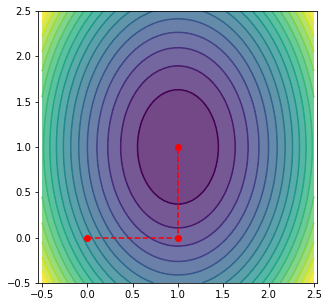

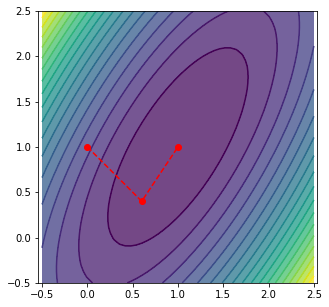

In [53]:
def f0(x, y):
    return 2*(x-1)**2+(y-1)**2

def f1(x, y):
    return (x-y)**2+(x-1)**2

def draw_contourMap(xx, yy, f):
    plt.figure(figsize=(5, 5))
    plt.axis('equal')
    plt.contourf(xx, yy, f(xx, yy), 20, alpha=.75)
    plt.contour(xx, yy, f(xx, yy), 20, )

x, y = np.linspace(-.5, 2.5), np.linspace(-.5, 2.5)
xx, yy = np.meshgrid(x, y)

draw_contourMap(xx, yy, f0)
plt.plot([0., 1., 1.], [0., 0., 1.], 'ro--')

draw_contourMap(xx, yy, f1)
plt.plot([0., 0.6, 1., ], [1., 0.4, 1., ], 'ro--')